# Évaluation C - 2025 : Arbres de décision et de régression en Python
À l’issue de l’évaluation, vous devez déposer le notebook, sous le nom **contAnomprenom.ipynb** dans **dépôt évaluation TP**

## **1. Les données**
*Source des données : Paulo Cortez, Université du Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez*  
Les données ont été légèrement modifiées (type) pour des raisons pédagogiques.  

**Fichier : contC.csv**  
Ces données portent sur les résultats des élèves de l'enseignement secondaire de deux écoles portugaises. Les variables que nous avons retenues dans ce fichier : 

### Liste des variables
* **sexe** : sexe de l'élève (binaire : 'F' - femme ou 'M' - homme)
* **age** : âge de l'étudiant (numérique : de 15 à 22)
* **Medu** : niveau d'éducation de la mère (numérique : 0 - aucun, 1 - enseignement primaire, 2 – Collège, 3 – Lycée ou 4 – enseignement supérieur) 
* **Pedu** : éducation du père (numérique : 0 - aucun, 1 - enseignement primaire, 2 – Collège, 3 – Lycée ou 4 – enseignement supérieur)
* **tempstrajet** :  temps de trajet domicile-école (numérique : 1 - <15 min., 2 - 15 à 30 min., 3 - 30 min. à 1 heure ou 4 - >1 heure)
* **redoublement** : nombre de redoublements antérieurs (numérique : n si 1<=n<3, sinon 4)
* **courspart** : l’élève bénéficie de cours particuliers (binaire : oui ou non)
* **famrel** : qualité des relations familiales (numérique : de 1 - très mauvaise à 5 - excellente)
* **sante** : état de santé actuel (numérique : de 1 - très mauvais à 5 - très bon)
* **absences** : nombre d'absences scolaires (numérique : de 0 à 93)
* **note1** : note de première période (numérique : de 0 à 20) 
* **note2** : note de deuxième période (numérique : de 0 à 20) 
* **resultat** : validation du cours (validé ou pas validé)
  
Nous allons, à partir de ces données, construire des arbres de décision/régression.   

# **Important !** 
Les variables **cibles** sont **note1**, **note2** et **resultat**.
Les variables **explicatives** sont les autres variables.  
Les variables **note1, note2** et **resultat** ne doivent pas être utilisées comme **variables explicatives**


## **2. Importation et préparation des données**

#### **Importation des librairies**

In [1]:
import numpy as np					#Pour la manipulation de tableaux
import pandas as pd					#Pour l’importation des données
from sklearn.tree import DecisionTreeClassifier,plot_tree,DecisionTreeRegressor	#Pour l’arbre
import matplotlib.pyplot as plt     #Pour l’affichage de l’arbre
import os							#Pour le répertoire par défaut

#### **Modification du répertoire par défaut**

In [2]:
# etant donne que le fichier est dans le meme repertoire que le script, on peut le lire directement

#### **Importation des données (à compléter)**

In [2]:
ControleC = pd.read_table('ControleC.csv',sep=';', decimal=',')

#### **Vérification - Contenu du dataframe employes**
* **head()** permet d'afficher les premières lignes (5 par défaut) du dataframe
* **dtypes** permet de lister les variables du dataframe avec leur type

In [3]:
ControleC.head()

,sexe,age,Medu,Fedu,tempstrajet,ecole_ori,note1,note2,redoublement,courspart,famrel,sante,absences,resultat
0,F,18,4.0,4,18.0,A,5,6,0,yes,4,3,6,non validé
1,F,17,1.0,1,6.0,B,5,5,0,no,5,3,4,non validé
2,F,15,1.0,1,13.0,B,7,8,3,yes,4,3,10,validé
3,F,15,4.0,2,NaN,A,15,14,0,no,3,5,2,validé
4,F,16,3.0,3,3.0,B,6,10,0,no,4,5,4,validé


In [4]:
ControleC.dtypes

sexe             object
age               int64
Medu            float64
Fedu              int64
tempstrajet     float64
ecole_ori        object
note1             int64
note2             int64
redoublement      int64
courspart        object
famrel            int64
sante             int64
absences          int64
resultat         object
dtype: object

#### **Variables catégorielles**
Nous définissons les variables **qualitatives** comme catégorielles (categorical)
**Attention** : une variable numérique peut être qualitative *(se référer à la description des données)*

In [5]:
# sexe
# medu
# pedu
# courspart
# famrel
# sante
# resultat


ControleC['sexe'] = ControleC['sexe'].astype('category')
ControleC['Medu'] = ControleC['Medu'].astype('category')
ControleC['Fedu'] = ControleC['Fedu'].astype('category')
ControleC['courspart'] = ControleC['courspart'].astype('category')
ControleC['famrel'] = ControleC['famrel'].astype('category')
ControleC['sante'] = ControleC['sante'].astype('category')
ControleC['resultat'] = ControleC['resultat'].astype('category')


##### **Vérification**

In [6]:
ControleC.dtypes

sexe            category
age                int64
Medu            category
Fedu            category
tempstrajet      float64
ecole_ori         object
note1              int64
note2              int64
redoublement       int64
courspart       category
famrel          category
sante           category
absences           int64
resultat        category
dtype: object

## **3. Contraintes sur les données**
**Rappel** : pour faire un arbre en **Python**, avec la bibliothèque **scikit-learn** : 
* Les variables **explicatives** ne doivent pas avoir de **valeurs manquantes**
* Les variables **qualitatives explicatives** doivent être codées **numériquement**, qu'elles soient catégorielles ou non.

### **3.1. Première contrainte : suppression des valeurs manquantes sur les variables explicatives**


S’il y en a, une méthode classique est de les remplacer : on parle **d’imputation**.  
Cette imputation peut se faire par la **moyenne**, la **médiane**, la valeur **modale** (la plus fréquente)…

#### **Détection des valeurs manquantes**

In [7]:
ControleC.isna().sum()

sexe            1
age             0
Medu            1
Fedu            0
tempstrajet     3
ecole_ori       0
note1           0
note2           0
redoublement    0
courspart       0
famrel          0
sante           0
absences        0
resultat        0
dtype: int64

#### **Imputations**

In [8]:
# sexe
# medu
# tempsTrajet

ControleC['sexe'] = ControleC['sexe'].fillna(ControleC['sexe'].mode()[0])
ControleC['Medu'] = ControleC['Medu'].fillna(ControleC['Medu'].mode()[0])
ControleC['tempstrajet'] = ControleC['tempstrajet'].fillna(ControleC['tempstrajet'].median())

##### **Vérification**

In [9]:
ControleC.isna().sum()

sexe            0
age             0
Medu            0
Fedu            0
tempstrajet     0
ecole_ori       0
note1           0
note2           0
redoublement    0
courspart       0
famrel          0
sante           0
absences        0
resultat        0
dtype: int64

### **3.2. Deuxième contrainte : les modalités des variables explicatives doivent être numériques**
Quelles sont les variables concernées ?
Pour répondre, nous pouvons afficher les premières lignes du dataframe ou faire une boucle sur les variables catégorielles, pour afficher leurs modalités. 

#### **Affichage des premières lignes du dataframe**

In [10]:
ControleC.head()

,sexe,age,Medu,Fedu,tempstrajet,ecole_ori,note1,note2,redoublement,courspart,famrel,sante,absences,resultat
0,F,18,4.0,4,18.0,A,5,6,0,yes,4,3,6,non validé
1,F,17,1.0,1,6.0,B,5,5,0,no,5,3,4,non validé
2,F,15,1.0,1,13.0,B,7,8,3,yes,4,3,10,validé
3,F,15,4.0,2,13.0,A,15,14,0,no,3,5,2,validé
4,F,16,3.0,3,3.0,B,6,10,0,no,4,5,4,validé


In [11]:
for sexe, cat in ControleC.dtypes.items():
    if cat == "category" :
        print("Modalités de ", sexe, " : ",ControleC[sexe].unique(), "\n")

Modalités de  sexe  :  ['F', 'M']
Categories (2, object): ['F', 'M'] 

Modalités de  Medu  :  [4.0, 1.0, 3.0, 2.0, 0.0]
Categories (5, float64): [0.0, 1.0, 2.0, 3.0, 4.0] 

Modalités de  Fedu  :  [4, 1, 2, 3, 0]
Categories (5, int64): [0, 1, 2, 3, 4] 

Modalités de  courspart  :  ['yes', 'no']
Categories (2, object): ['no', 'yes'] 

Modalités de  famrel  :  [4, 5, 3, 1, 2]
Categories (5, int64): [1, 2, 3, 4, 5] 

Modalités de  sante  :  [3, 5, 1, 2, 4]
Categories (5, int64): [1, 2, 3, 4, 5] 

Modalités de  resultat  :  ['non validé', 'validé']
Categories (2, object): ['non validé', 'validé'] 



#### **Affichage des modalités des variables catégorielles**
**Rappel** : La méthode `unique()` permet d'afficher les modalités ou les valeurs d'une variable.   
Nous pouvons l'appliquer à chaque variable catégorielle du dataframe, pour savoir si elle contient des **modalités non numériques**.

In [12]:
listeSexe = list(ControleC['sexe'].unique())
listeCoursPart = list(ControleC['courspart'].unique())


listeSexe,listeCoursPart


(['F', 'M'], ['yes', 'no'])

#### **Recodage des modalités non numériques des variables catégorielles (qualitatives)**
Pour chaque variable concernée, il faudra créer un dictionnaire de correspondance pour recoder les modalités.
##### **Dictionnaire(s) de correspondances**

In [14]:
dicSexe = {}
for i in range(len(listeSexe)):
    dicSexe[listeSexe[i]] = i


dicCoursPart = {}
for i in range(len(listeCoursPart)):
    dicCoursPart[listeCoursPart[i]] = i

dicSexe,dicCoursPart



({'F': 0, 'M': 1}, {'yes': 0, 'no': 1})

##### **Recodage(s)**

In [15]:
ControleC['recodage_sexe'] = ControleC['sexe'].cat.rename_categories(dicSexe)
ControleC['recodage_courspart'] = ControleC['courspart'].cat.rename_categories(dicCoursPart)

#### **Vérification par affichage des premières valeurs du dataframe**

In [16]:
ControleC.head()

,sexe,age,Medu,Fedu,tempstrajet,ecole_ori,note1,note2,redoublement,courspart,famrel,sante,absences,resultat,recodage_sexe,recodage_courspart
0,F,18,4.0,4,18.0,A,5,6,0,yes,4,3,6,non validé,0,0
1,F,17,1.0,1,6.0,B,5,5,0,no,5,3,4,non validé,0,1
2,F,15,1.0,1,13.0,B,7,8,3,yes,4,3,10,validé,0,0
3,F,15,4.0,2,13.0,A,15,14,0,no,3,5,2,validé,0,1
4,F,16,3.0,3,3.0,B,6,10,0,no,4,5,4,validé,0,1


## **5. Arbre de décision**

### **5.1 Définition de la cible et des variables explicatives**
Définir : 
* une Serie **cible**, contenant la variable cible du futur arbre de décision (on n'a pas trop le choix)
* un DataFrame **df_explic** ne contenant que les variables explicatives dont les noms seront stockés dans la liste **liste_explic**

In [17]:
# creation de la cible
cible = ControleC['resultat']

#creation du tableau des varaibles explicatives
#recuperation des noms des variables
print(list(ControleC.columns))

#creation du tableau des variable explicatives (on enleve la variable cible de la liste)
explic = ControleC.loc[:,['recodage_sexe','Medu','Fedu','recodage_courspart','famrel','sante','tempstrajet']]

['sexe', 'age', 'Medu', 'Fedu', 'tempstrajet', 'ecole_ori', 'note1', 'note2', 'redoublement', 'courspart', 'famrel', 'sante', 'absences', 'resultat', 'recodage_sexe', 'recodage_courspart']


#### **Paramétrage et calcul de l'arbre**

In [18]:
class_arbre = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
digit_tree = class_arbre.fit(explic,cible)

#### **Représentation graphique de l’arbre**

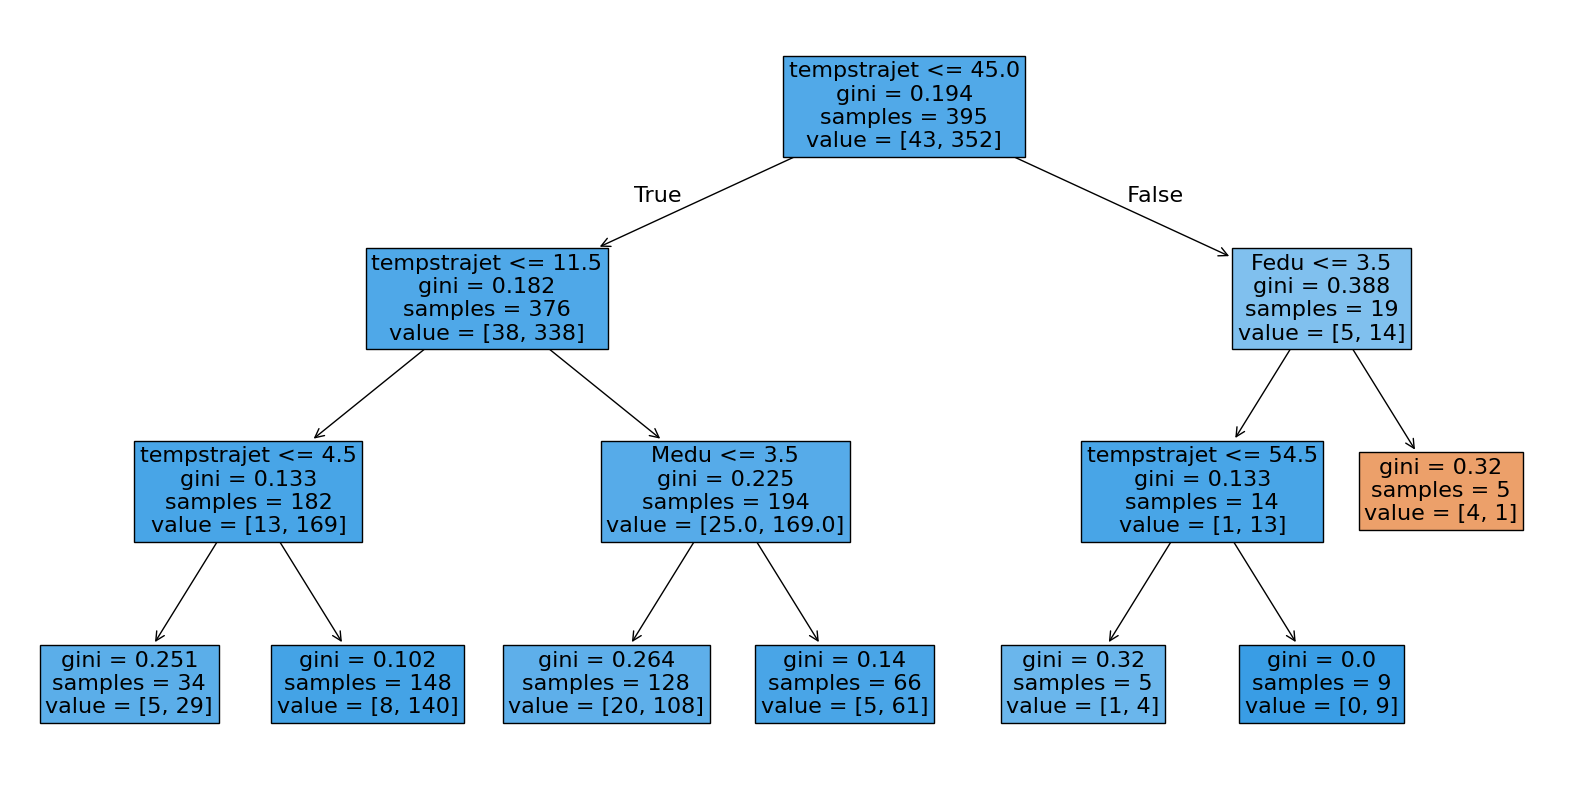

In [19]:
nomvar = ['recodage_sexe','Medu','Fedu','recodage_courspart','famrel','sante','tempstrajet']
plt.figure(figsize=(20,10))
plot_tree(digit_tree,
          fontsize=16,
          filled=True,
          feature_names=nomvar)
plt.show()

## **6. Attention aux variables qualitatives nominales !**
Dans l'arbre de décision ci-dessus, les variables qualitatives recodées sont systématiquement traitées sous forme **ordinale**.  
Ce qui n'est pas adapté aux variables **nominales**.   
Quelles sont la ou les variables concernées ?  
Utiliser la fonction **get_dummies** pour corriger le problème. 

In [20]:
ControleC.dtypes
ControleC = pd.get_dummies(ControleC, columns=['sexe','courspart'])
ControleC.head()

,age,Medu,Fedu,tempstrajet,ecole_ori,note1,note2,redoublement,famrel,sante,absences,resultat,recodage_sexe,recodage_courspart,sexe_F,sexe_M,courspart_no,courspart_yes
0,18,4.0,4,18.0,A,5,6,0,4,3,6,non validé,0,0,True,False,False,True
1,17,1.0,1,6.0,B,5,5,0,5,3,4,non validé,0,1,True,False,True,False
2,15,1.0,1,13.0,B,7,8,3,4,3,10,validé,0,0,True,False,False,True
3,15,4.0,2,13.0,A,15,14,0,3,5,2,validé,0,1,True,False,True,False
4,16,3.0,3,3.0,B,6,10,0,4,5,4,validé,0,1,True,False,True,False


## **7. Nouvel arbre de décision**
#### **Variables cible et explicatives**

In [23]:
cible = ControleC['resultat']
print(list(ControleC.columns))
explic = ControleC.loc[:,['Medu','Fedu','famrel','sante','tempstrajet','sexe_F','sexe_M','courspart_no','courspart_yes']]

['age', 'Medu', 'Fedu', 'tempstrajet', 'ecole_ori', 'note1', 'note2', 'redoublement', 'famrel', 'sante', 'absences', 'resultat', 'recodage_sexe', 'recodage_courspart', 'sexe_F', 'sexe_M', 'courspart_no', 'courspart_yes']


#### **Paramétrage de l'arbre**

In [24]:
class_arbre = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
digit_tree = class_arbre.fit(explic,cible)

#### **Affichage de l'arbre**

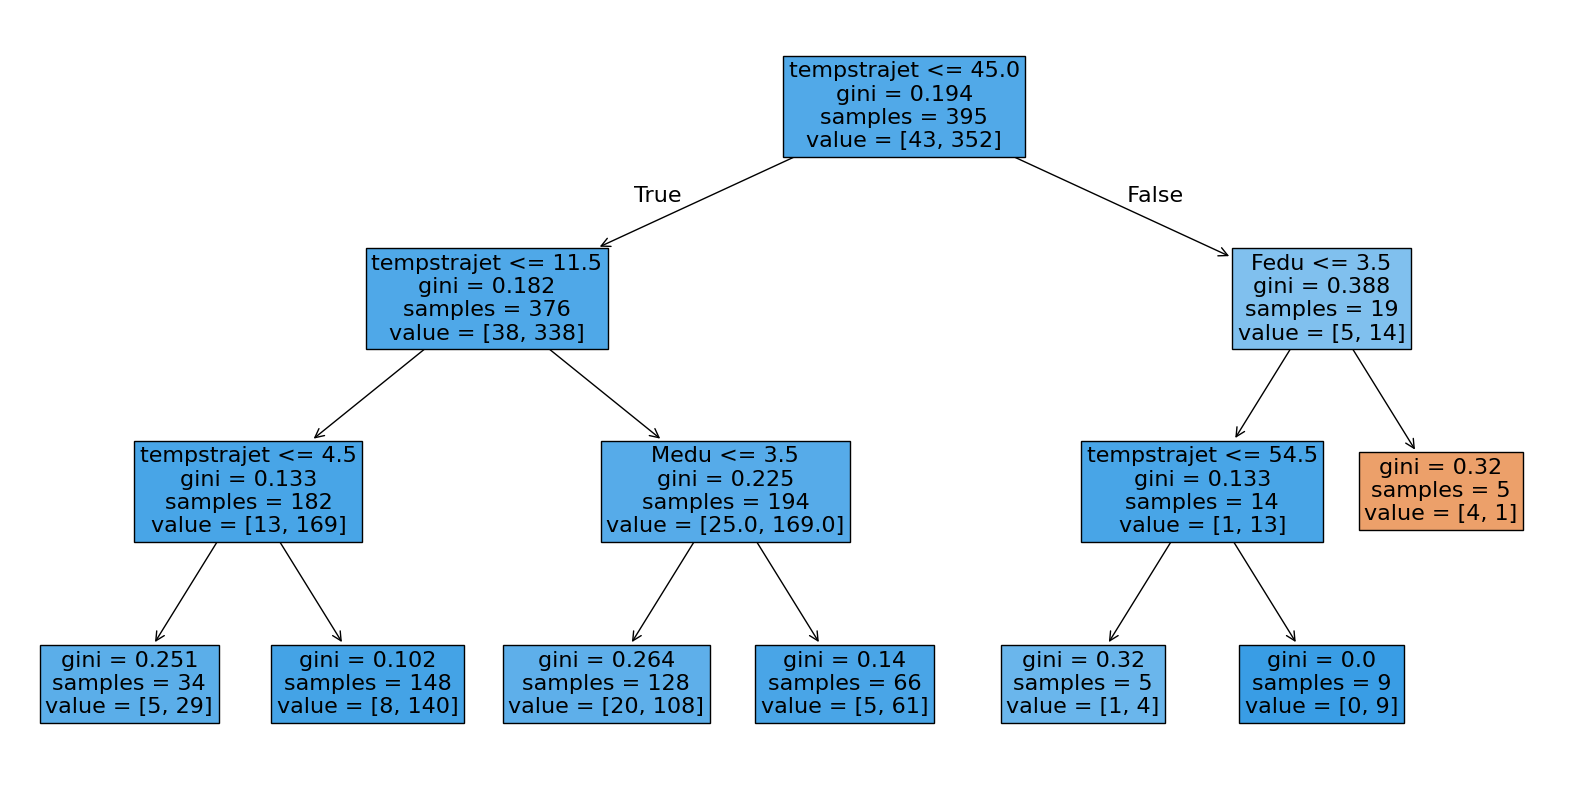

In [25]:
nomvar = list(explic.columns)
plt.figure(figsize=(20,10))
plot_tree(digit_tree,
          fontsize=16,
          filled=True,
          feature_names=nomvar)
plt.show()

### **Vérifications** 
**À traiter éventuellement à la fin de l'évaluation, s'il vous reste du temps, après l'arbre de régression** (questions suivantes)  

En utilisant des **fonctions basiques**, vérifier les valeurs obtenues sur les trois premiers nœuds de l’arbre.   
#### **Exemples de fonctions basiques** 
* **value_counts()** pour obtenir un tableau de fréquence. **Poly p20**
*  **crosstab** pour un tableau de contingence. **Poly p23**

## **8. Arbres de régression** 
Choisir maintenant une variable **quantitative** cible parmi celles qui ont été désignées comme telles, dans la présentation des données.

In [26]:

#recodage numerique de la variable resultat
listeResultat = list(ControleC['resultat'].unique())
dicResultat = {}
for i in range(len(listeResultat)):
    dicResultat[listeResultat[i]] = i
ControleC['recodage_resultat'] = ControleC['resultat'].cat.rename_categories(dicResultat)

cible = ControleC['age']
print(list(ControleC.columns))
explic = ControleC.loc[:,['Medu','Fedu','famrel','sante','recodage_resultat','sexe_F','sexe_M','courspart_no','courspart_yes']]
nomvar = list(explic.columns)


['age', 'Medu', 'Fedu', 'tempstrajet', 'ecole_ori', 'note1', 'note2', 'redoublement', 'famrel', 'sante', 'absences', 'resultat', 'recodage_sexe', 'recodage_courspart', 'sexe_F', 'sexe_M', 'courspart_no', 'courspart_yes', 'recodage_resultat']


### **8.1 Paramétrage et affichage de l'arbre de régression**

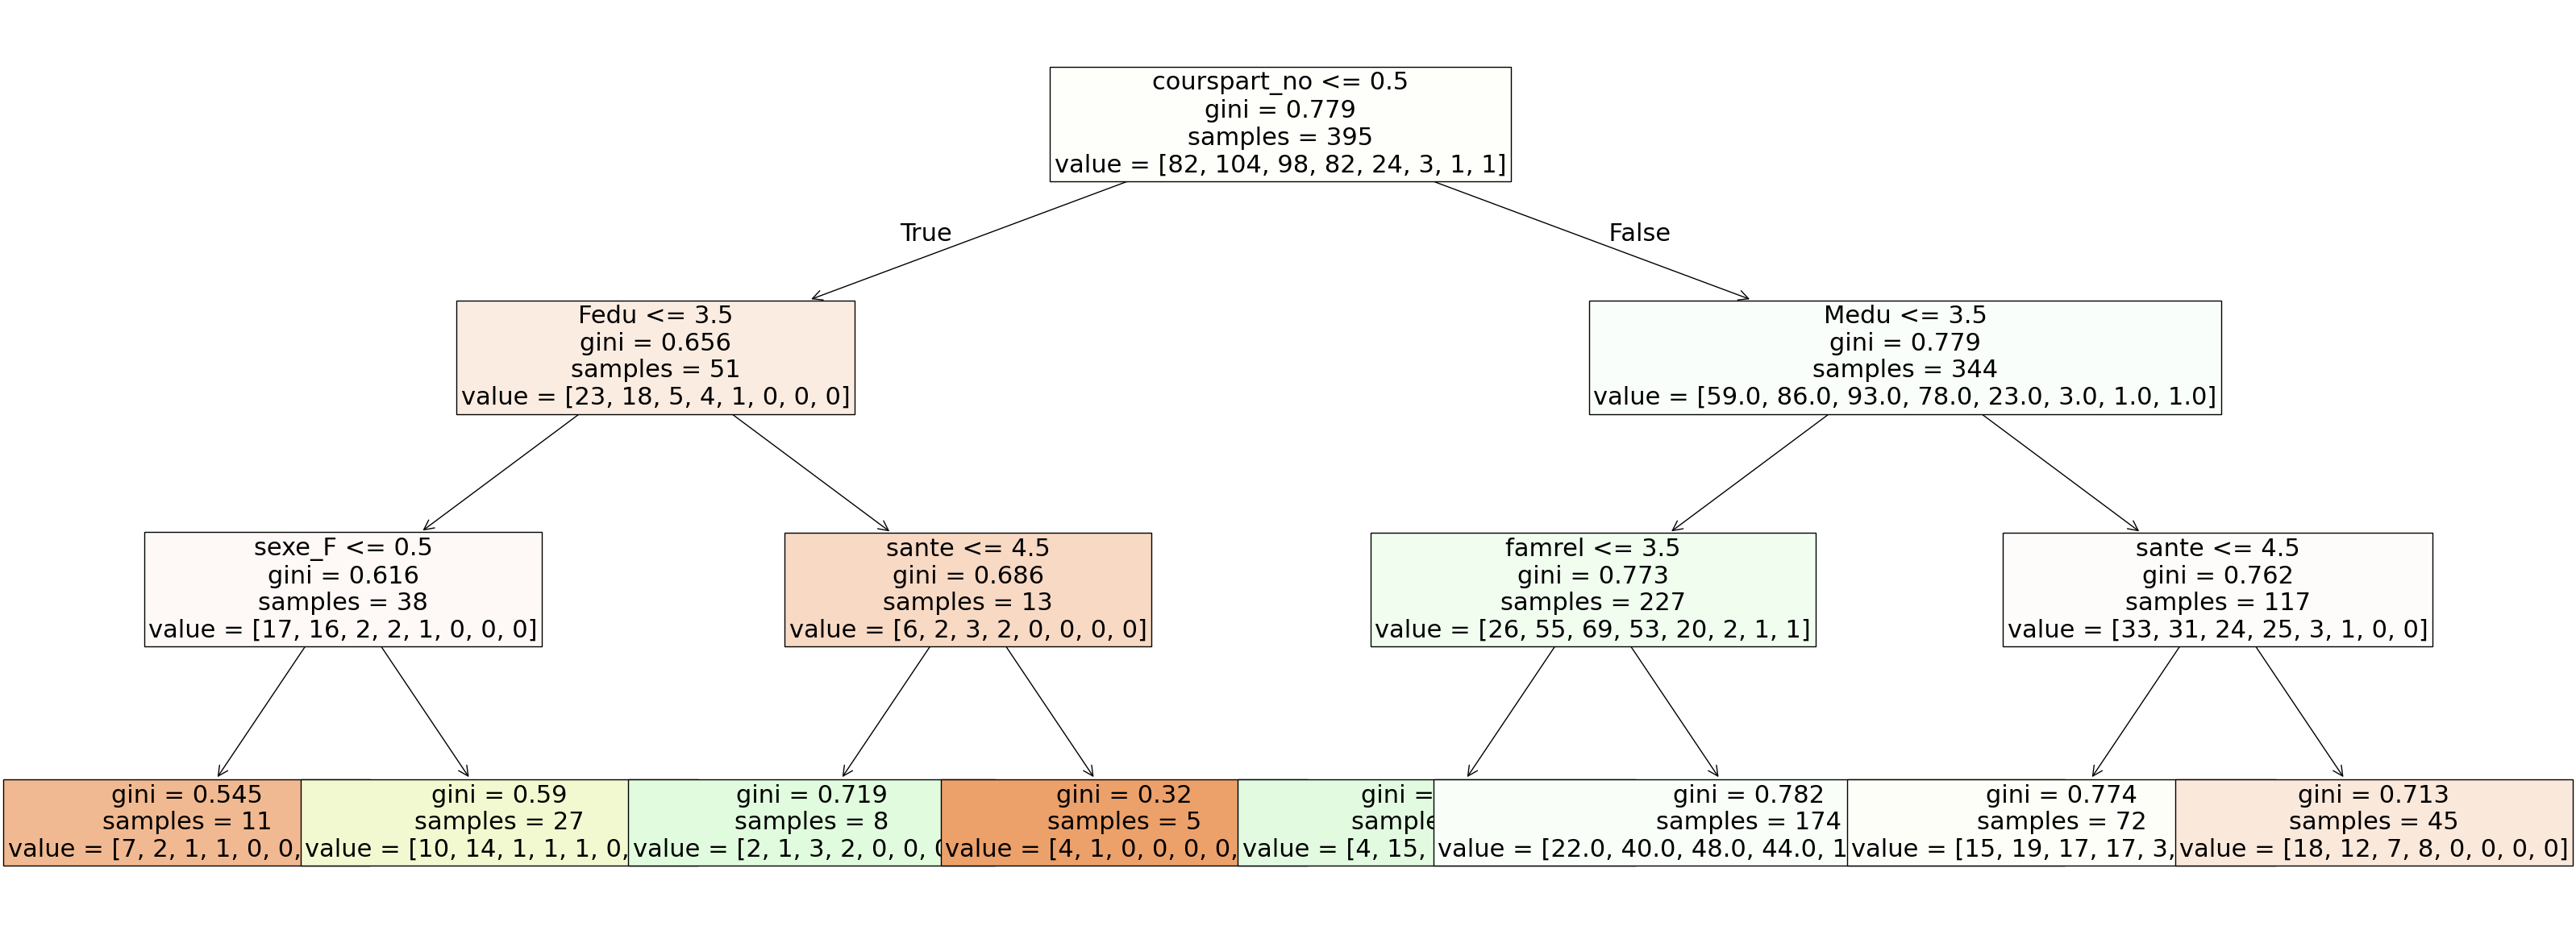

In [27]:
class_arbre = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
digit_tree = class_arbre.fit(explic,cible)
plt.figure(figsize=(40,15))
plot_tree(digit_tree,
          fontsize=22,
          filled=True,
          feature_names=nomvar)
plt.show()

### **Vérifications** 

En utilisant des **fonctions basiques**, vérifier les valeurs obtenues sur les trois premiers nœuds de l’arbre.   
#### **Exemples de fonctions basiques (rappels)** : 
* **len** permet de déterminer le nombre d'individus d'un DataFrame ou d'une Serie
* **var()** et **var(ddof=0)**, appliquées à des Series, permettent de calculer les variances non biaisées et biaisées d'une variable *(la notion de biais n'a pas été vue en cours)*. **Poly p.18**
* **pd.cut()**, utilisées avec les options **bins =** et **labels =** permet de scinder la population en sous-population à partir des valeurs observées sur une variable quantitative. **Poly p.13**
* **groupby()** permet d'accéder aux sous-Series associées aux modalités d'une variable qualitative. Les méthodes **size(), mean(), var()**... peuvent ensuite être appliquées à ces sous-ensembles de données. **Poly p.24**
